# TLS with QuTIP

In [1]:
from qutip import *
import matplotlib.pyplot as plt
import numpy as np
import scipy
import seaborn as sns

#### Hamiltoniano del sistema en la base $|L\rangle, |R\rangle$
$H= \begin{pmatrix}
        \delta/2 & \tau/2 \\
        \tau/2 & -\delta/2
    \end{pmatrix}$

In [2]:
# creación del Hamiltoniano del TLS
def hamiltonian_creator(epsL, epsR, tau):

    Hz = delta/2*qutip.sigmaz()
    Hx = tau/2*qutip.sigmax()

    H = Hz+Hx
    
    return H

In [3]:
epsL = 6
epsR = 5.5
tau = 0.6

delta = (epsR-epsL)

H = hamiltonian_creator(epsL, epsR, tau)
H

Quantum object: dims = [[2], [2]], shape = (2, 2), type = oper, isherm = True
Qobj data =
[[-0.25  0.3 ]
 [ 0.3   0.25]]

In [4]:
L = qutip.basis(2,0)
R = qutip.basis(2,1)
psi0 = L
psi0

Quantum object: dims = [[2], [1]], shape = (2, 1), type = ket
Qobj data =
[[1.]
 [0.]]

In [5]:
t = np.linspace(0, 100, 1000)

states = qutip.sesolve(H, psi0, t).states

pLs = []
pRs = []
for state in states:
    pLs.append(np.abs(L.overlap(state))**2)
    pRs.append(np.abs(R.overlap(state))**2)

In [6]:
import matplotlib

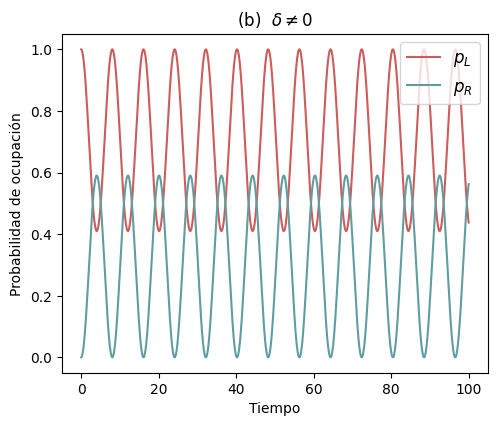

In [7]:
factor = 2.2
fig, ax = plt.subplots(figsize=(2.5*factor,2*factor))

ps = [pLs, pRs]

ax.plot(t, pLs, 'indianred')
ax.plot(t, pRs, 'cadetblue')

plt.title('(b)  'r'$\delta\neq0$')
ax.set_xlabel('Tiempo')
ax.set_ylabel('Probabilidad de ocupación')
ax.legend((r'$p_L$', r'$p_R$'), prop = {'size': 12}, loc='upper right')
plt.savefig('./figs/und_nresonant_TLS.pdf')


plt.show()